In [9]:
# 1、获取数据
import pandas as pd

data = pd.read_csv('/Users/zhangqihao/Desktop/PYTHON/机器学习/机器学习资料4/data.csv')

In [10]:
# 数据探索
# 因为数据集中列比较多，我们需要把dataframe中的列全部显示出来
pd.set_option('display.max_columns', None)
print(data.columns)
print(data.head(5))
print(data.describe())

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42

In [11]:
# 2、数据处理

# 将特征字段分成3组
features_mean= list(data.columns[2:12])
features_se= list(data.columns[12:22])
features_worst=list(data.columns[22:32])

# 数据清洗
# ID列没有用，删除该列
data.drop("id",axis=1,inplace=True)

# 将B良性替换为0，M恶性替换为1
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})


# 在第三步数据可视化，选择特征后，进行特征选择
features_remain = ['radius_mean','texture_mean', 
                   'smoothness_mean','compactness_mean',
                   'symmetry_mean', 'fractal_dimension_mean'] 

## 如何选择数据？
我们能看到 mean、se 和 worst 这三组特征是对同一组内容的不同度量方式，我们可以保留 mean 这组特征，在特征选择中忽略掉 se 和 worst。同时我们能看到 mean 这组特征中，radius_mean、perimeter_mean、area_mean 这三个属性相关性大，compactness_mean、daconcavity_mean、concave points_mean 这三个属性相关性大。我们分别从这 2 类中选择 1 个属性作为代表，比如 radius_mean 和 compactness_mean。

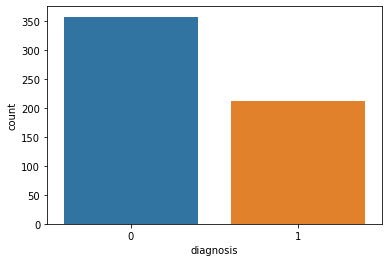

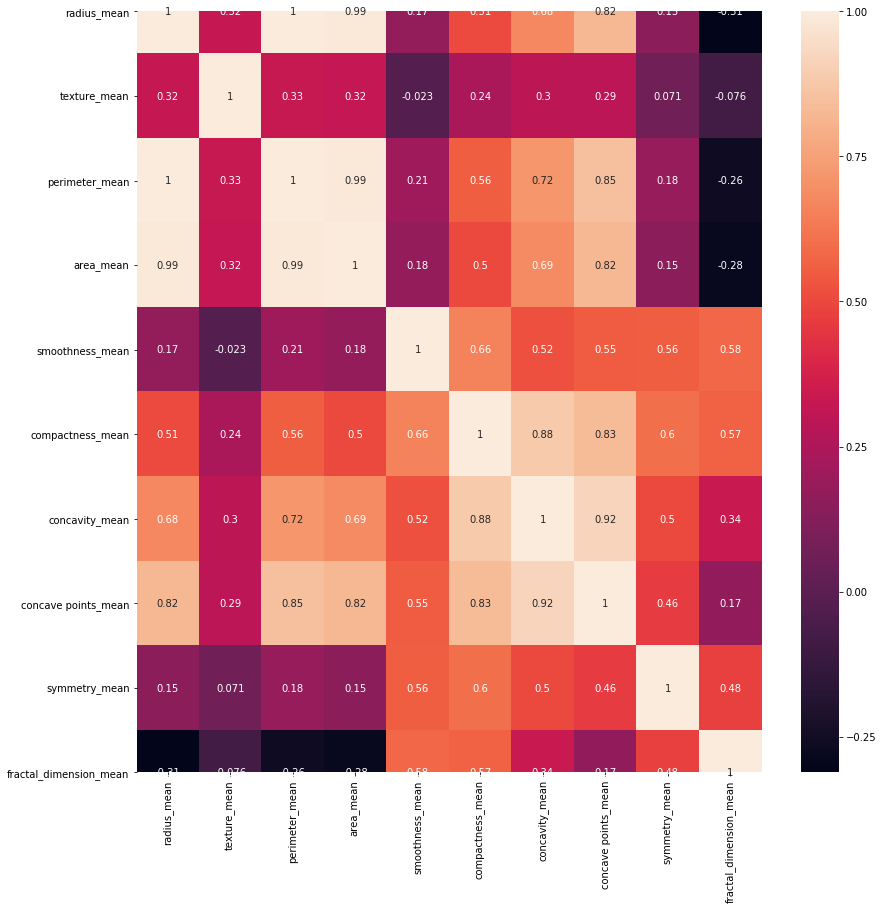

In [7]:
# 3、数据可视化
import matplotlib.pyplot as plt
import seaborn as sns

# 将肿瘤诊断结果可视化
sns.countplot(data['diagnosis'],label="Count")
plt.show()

# 用热力图呈现features_mean字段之间的相关性
corr = data[features_mean].corr()
plt.figure(figsize=(14,14))
# annot=True显示每个方格的数据
sns.heatmap(corr, annot=True)
plt.show()

In [12]:
# 4、数据集划分
from sklearn.model_selection import train_test_split

# 抽取30%的数据作为测试集，其余作为训练集
train, test = train_test_split(data, test_size = 0.3)

# 抽取特征选择的数值作为训练和测试数据
x_train = train[features_remain]
y_train=train['diagnosis']
x_test= test[features_remain]
y_test =test['diagnosis']

In [14]:
# 5、无量纲化处理
from sklearn.preprocessing import StandardScaler

# 采用Z-Score规范化数据，保证每个特征维度的数据均值为0，方差为1
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

In [15]:
# 6、SVM预估器
from sklearn import svm

estimator = svm.SVC()
estimator.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [18]:
# 7、模型评估

# 方法1：直接比对真实值和预测值
y_predict = estimator.predict(x_test)
print("y_predict:\n", y_predict)
print("直接比对真实值和预测值:\n", y_test == y_predict)

# 方法2：计算准确率
score = estimator.score(x_test, y_test)
print("准确率为：\n", score)

y_predict:
 [0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1
 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1
 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0]
直接比对真实值和预测值:
 125    True
32     True
320    True
395    True
35     True
       ... 
130    True
196    True
208    True
167    True
221    True
Name: diagnosis, Length: 171, dtype: bool
准确率为：
 0.9298245614035088
